In [1]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
import pandas as pd
from osc_toolkit import oscillation, delayed_oscillation
from models import *
from functools import partial

In [2]:
df_fig4_NatChem_MH = pd.read_csv(r'Data_sets\3a_fig4_osc_NatChem_MH.csv')
cut_off, CMC_3a = 5.25, 1.56
tau = 1.15
C_A2tol = df_fig4_NatChem_MH.loc[0, 'cA2'] + df_fig4_NatChem_MH.loc[0, 'cA'] / 2

df_fig4_NatChem_MH[['cA2', 'cA']] /= C_A2tol
df_fig4_NatChem_MH['cS'] /= CMC_3a

for s in ['TA2', 'TS', 'TA']:
    df_fig4_NatChem_MH[s] /= tau

<Axes: xlabel='TA2'>

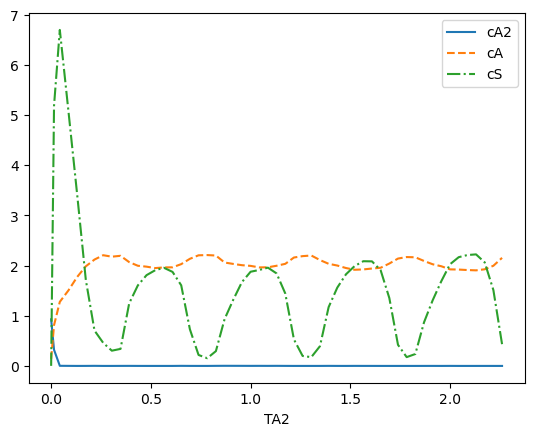

In [3]:
df_fig4_NatChem_MH.plot(x='TA2', y=['cA2', 'cA', 'cS'], style=['-', '--', '-.'])

In [4]:
params = np.array([15, 35.2, 0.65, 18.6])
consts = np.array([0.11, 2])
delay = np.array([0.02, 0.045])
init_cond = [0.9, 0]
delayed_model_fig4 = delayed_oscillation(delayed_approx_model_FTC, delay=delay, params=params, consts=consts, init_cond=init_cond, calc_all=calc_all_delayed_approx_model_FTC)
delayed_model_fig4.add_exp_data(df_fig4_NatChem_MH)
delayed_model_fig4.set_init_cond([0.93, 0])

The species are ['A2', 'S_sum', 'A', 'O']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.92917839 0.00132773 0.14164321]


In [10]:
delayed_model_fig4.set_delay([0.005, 0.01])
delayed_model_fig4.set_params([15, 15, 0.55, 10])
delayed_model_fig4.interactive_plot(exp=True, ran=40, ylim=3)

interactive(children=(FloatSlider(value=15.0, description='alpha', max=55.0, step=0.05), FloatSlider(value=15.…

In [2]:
df_figS3_NatChem_MH = pd.read_csv(r'Data_sets\3a_figS3_osc_NatChem_MH.csv')
cut_off, CMC_3a = 5.25, 1.56
tau = 1.15
C_A2tol = df_figS3_NatChem_MH.loc[0, 'cA2'] + df_figS3_NatChem_MH.loc[0, 'cA'] / 2

df_figS3_NatChem_MH[['cA2', 'cA']] /= C_A2tol
df_figS3_NatChem_MH['cS'] /= CMC_3a

for s in ['TA2', 'TS', 'TA']:
    df_figS3_NatChem_MH[s] /= tau

In [3]:
params = np.array([33, 25, 0.5, 13])
consts = np.array([0.11, 2])
delay = np.array([0.01, 0.02])
init_cond = [0.9, 0]
delayed_model_figS3 = delayed_oscillation(delayed_approx_model_FTC, delay=delay, params=params, consts=consts, init_cond=init_cond, calc_all=calc_all_delayed_approx_model_FTC)
delayed_model_figS3.add_exp_data(df_figS3_NatChem_MH)
delayed_model_figS3.set_init_cond([0.9, 0])

The species are ['A2', 'S_sum', 'A', 'O']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [1. 0. 0.]


In [ ]:
delayed_model_figS3.interactive_plot(exp=True, ran=50, ylim=3)

interactive(children=(FloatSlider(value=33.0, description='alpha', max=83.0, step=0.05), FloatSlider(value=25.…

# Full model with H2O2 consumption term

In [8]:
params = np.array([8.5, 0.7, 0.5, 6.2, 20.0])
consts = np.array([0.17, 2])
delay = np.array([0.25, 0.62])
init_cond = np.array([0.05, 0, 0.1])
delayed_model = delayed_oscillation(delayed_full_model_consumeO, delay, params, consts, init_cond, calc_all_delayed_full_model_consumeO)
delayed_model.set_species(['cA2', 'cS', 'cA', 'cO'])
delayed_model.add_exp_data(df_fig1f_NatChem_MH)

The species are ['cA2', 'cS', 'cA', 'cO']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.0120819  0.         1.97583619]


Generating, compiling, and loading C code.
Using default integration parameters.


(0.0, 3.0)

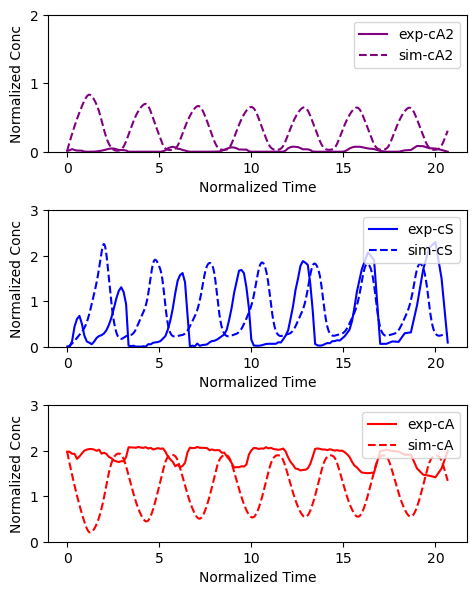

In [9]:
fig, axes = delayed_model.plot(t=6, exp=True, nvars=3)
axes[0].set_ylim(0, 2)
axes[0].set_yticks([0, 1, 2])
axes[1].set_ylim(0, 3)
axes[2].set_ylim(0, 3)